In [29]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib as mpl
import matplotlib.pyplot as plt


In [30]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [31]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# drop null columns
df_can.drop(df_can.columns[-8:], axis=1, inplace=True)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [33]:
df_can.shape

(195, 43)

In [34]:
df_can.info

<bound method DataFrame.info of            Type    Coverage          OdName  AREA AreaName   REG  \
0    Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1    Immigrants  Foreigners         Albania   908   Europe   925   
2    Immigrants  Foreigners         Algeria   903   Africa   912   
3    Immigrants  Foreigners  American Samoa   909  Oceania   957   
4    Immigrants  Foreigners         Andorra   908   Europe   925   
..          ...         ...             ...   ...      ...   ...   
190  Immigrants  Foreigners        Viet Nam   935     Asia   920   
191  Immigrants  Foreigners  Western Sahara   903   Africa   912   
192  Immigrants  Foreigners           Yemen   935     Asia   922   
193  Immigrants  Foreigners          Zambia   903   Africa   910   
194  Immigrants  Foreigners        Zimbabwe   903   Africa   910   

                RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0         Southern Asia  902  Developing regions    16  ...  2978  343

In [35]:
# remove irrelevant columns
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [36]:
# rename some columns to be clear 
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# make all column labels strings
all(isinstance(column, str) for column in df_can.columns)
# returns False

# make them all strings
df_can.columns = list(map(str, df_can.columns))
all(isinstance(column, str) for column in df_can.columns)

True

In [41]:
# set country as index
df_can.set_index('Country', inplace=True)

KeyError: "None of ['Country'] are in the columns"

In [43]:
# get years as list of strings
years = list(map(str, range(1980,2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [44]:
# add a total column
df_can['Total'] = df_can.sum(axis=1)

In [45]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Use Matplotlib to visualize data

In [53]:
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # for ggplot-like style


In [52]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.iloc[:5]
df_top5

# transpose the dataframe to get years on x axis
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


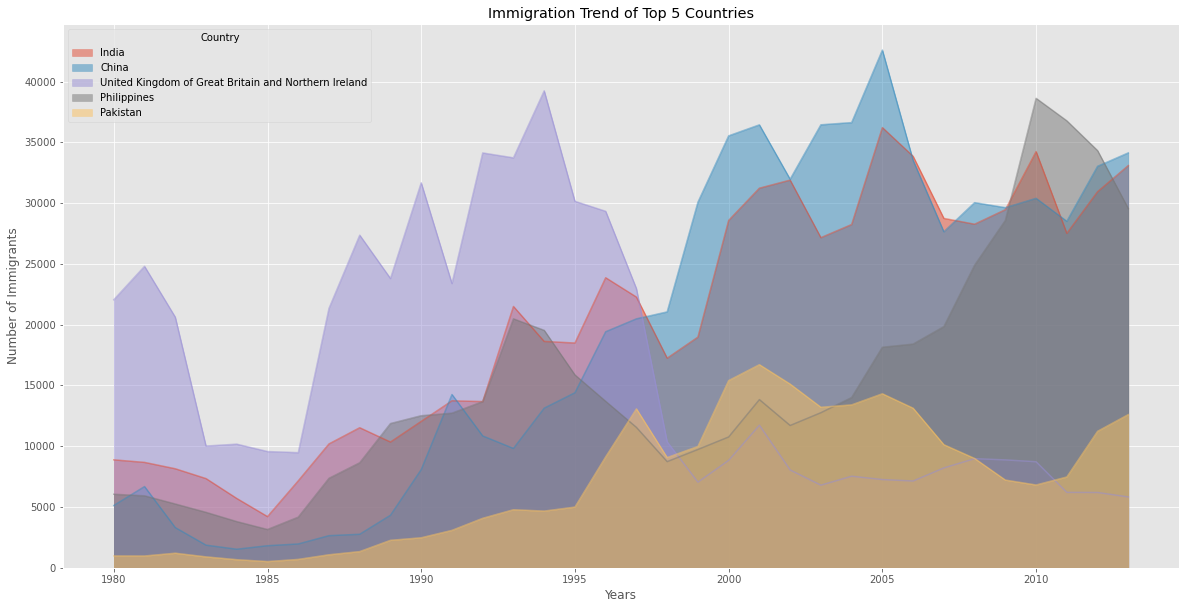

In [57]:
# change the index of dt_top5 to be integers for plotting
df_top5.index = df_top5.index.map(int)

# plot area plot (that is not stacked)
df_top5.plot(kind='area', 
            stacked=False,    # since stacked plots must have all values positive or all negative
            figsize=(20, 10), # pass a tuple (x, y) size
            )
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


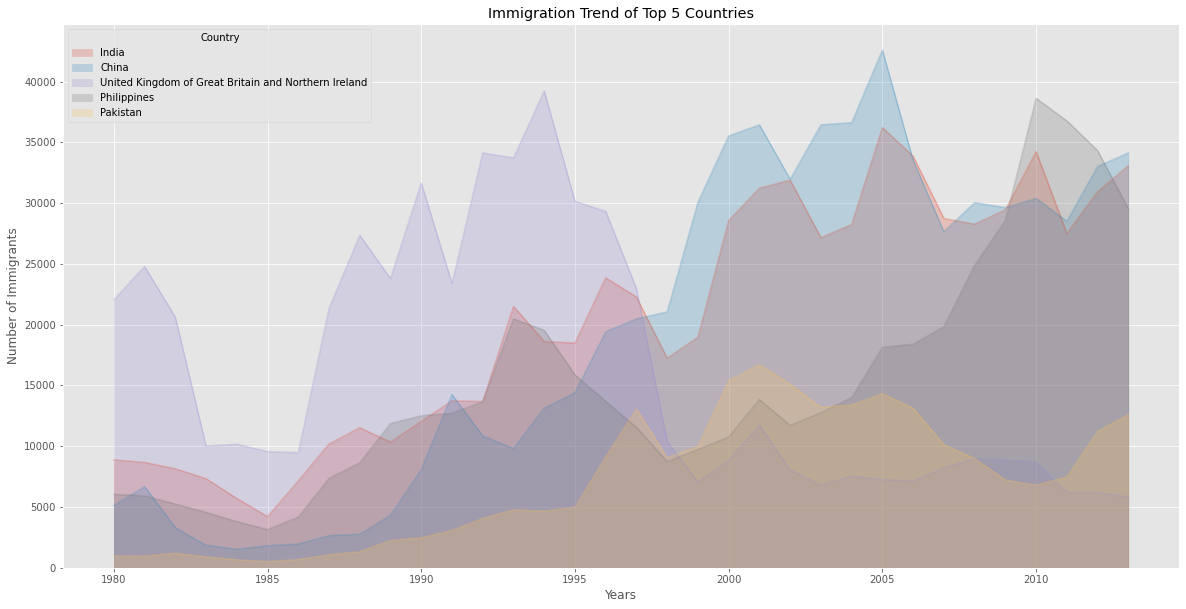

In [58]:
# change the transparency of the plot areas with alpha parameter

# plot area plot (that is not stacked)
df_top5.plot(kind='area', 
            stacked=False,    # since stacked plots must have all values positive or all negative
            figsize=(20, 10), # pass a tuple (x, y) size
            alpha=.25,      # can be between (0,1)
            )
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

We use matplotlib.pyplot as plt when we use the scripting layer of matplotlib

Can use the artist layer for more advanced visualizations
To do this, we use an Axes instance of current plot and store it in a variable (e.g. ax).
Then, add more elements by calling different methods on ax.


Text(0.5, 0, 'Years')

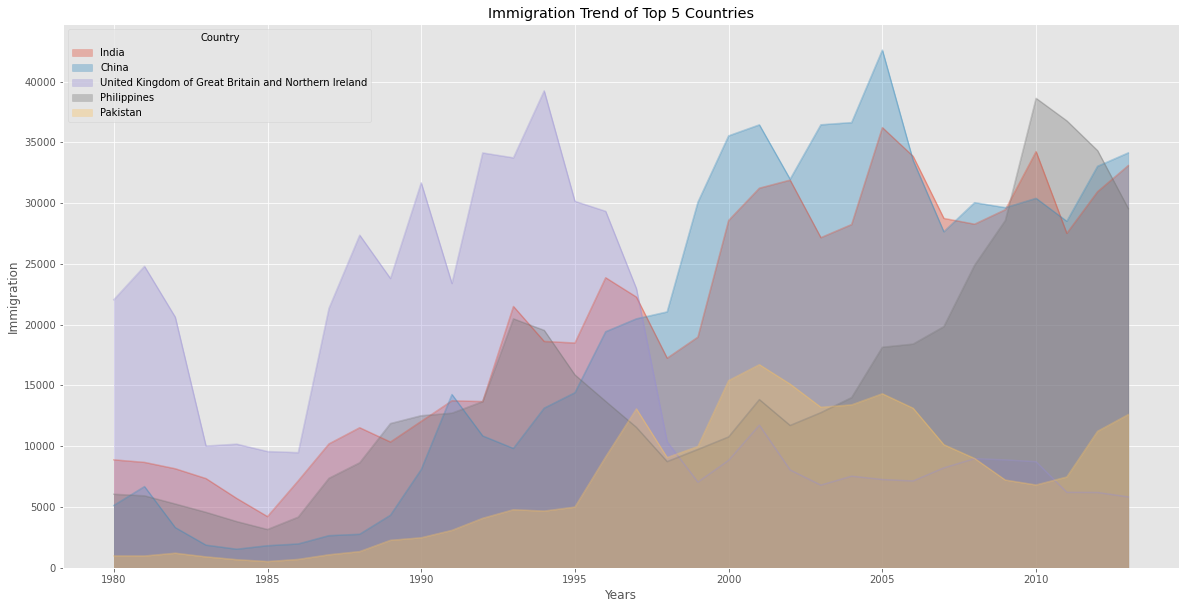

In [61]:
ax = df_top5.plot(kind='area', alpha=.35, figsize=(20, 10), stacked=False)

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Immigration')
ax.set_xlabel('Years')

Text(0.5, 0, 'Years')

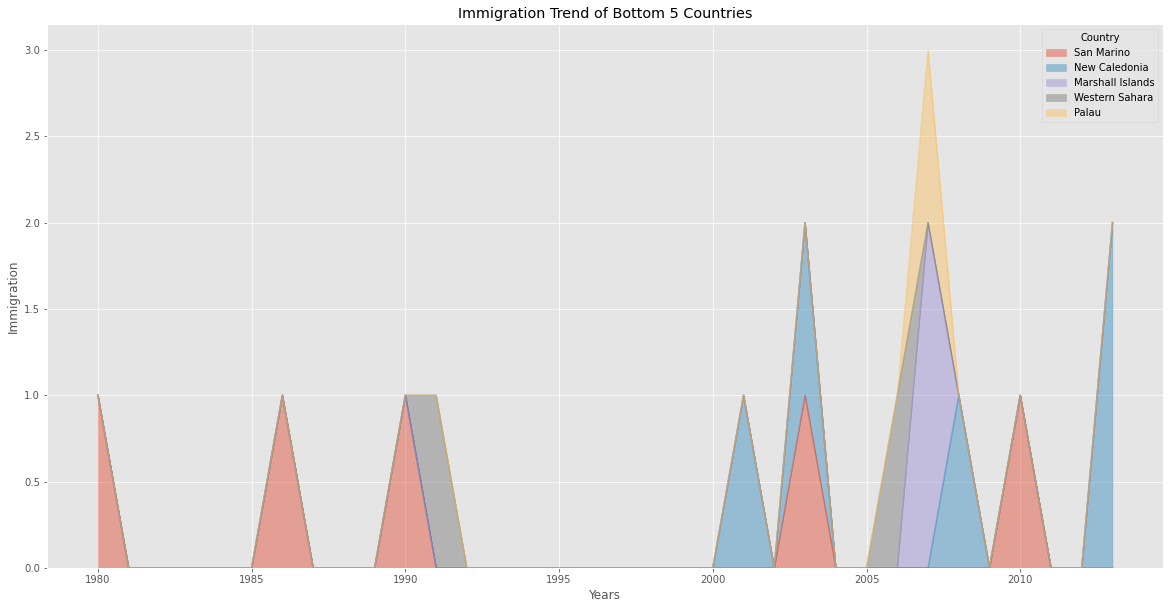

In [62]:
# Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013.
# get 5 bottom countries by immigration
df_bottom5 = df_can.iloc[-5:]

# transpose
df_bottom5 = df_bottom5[years].transpose()

# convert years to int for plotting
df_bottom5.index = df_bottom5.index.map(int)

df_bottom5.head()

# plot 
ax = df_bottom5.plot(kind='area', stacked=True, alpha=.45, figsize=(20, 10))
ax.set_title('Immigration Trend of Bottom 5 Countries by migration')
ax.set_ylabel('Immigration')
ax.set_xlabel('Years')


Text(0.5, 0, 'Years')

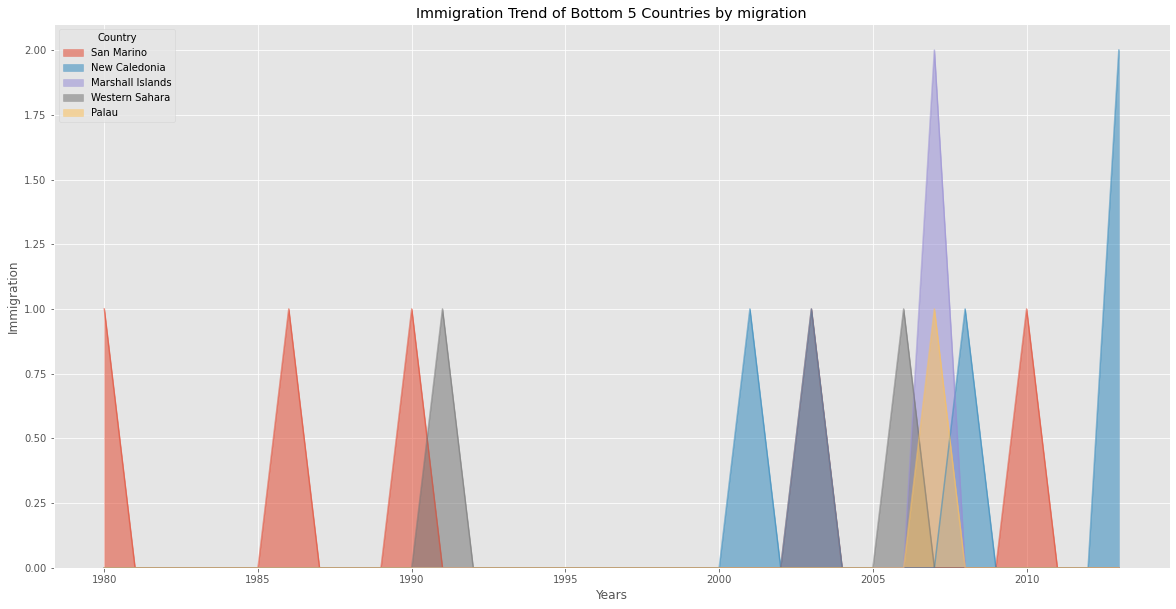

In [63]:
# Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. 
ax = df_bottom5.plot(kind='area', stacked=False, alpha=.55, figsize=(20, 10))
ax.set_title('Immigration Trend of Bottom 5 Countries by migration')
ax.set_ylabel('Immigration')
ax.set_xlabel('Years')

Histograms represent the frequency distribution of a numeric dataset.
They partition the x-axis into bins and assign each datapoint a bin, and then plot the number of datapoints in each bin.

Question: What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [65]:
# first view 2013 data
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [67]:
# use Numpy's histogram method to get the bin ranges and frequency counts
count, bin_edges = np.histogram(df_can['2013'])

print(count)
print(bin_edges) 
# by default, histogram method breaks dataset into 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


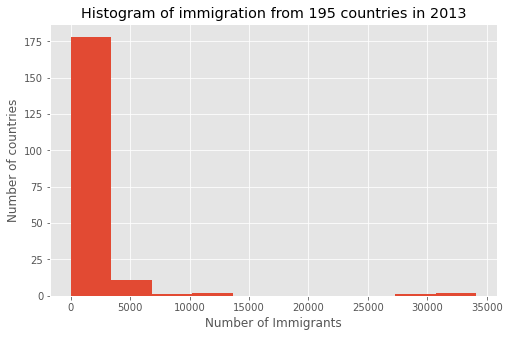

In [68]:
df_can['2013'].plot(kind='hist', figsize=(8,5))

plt.title('Histogram of immigration from 195 countries in 2013')
plt.ylabel('Number of countries')
plt.xlabel('Number of Immigrants')

plt.show()

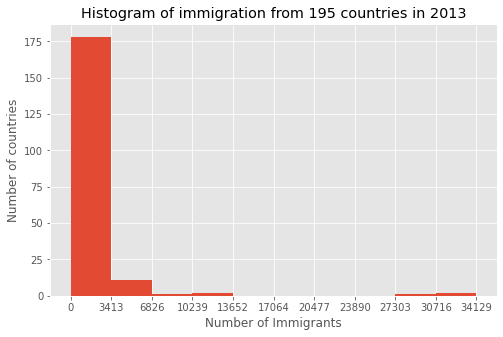

In [69]:
# match bin sizes to x labels using xticks keyword
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8,5), xticks=bin_edges)

plt.title('Histogram of immigration from 195 countries in 2013')
plt.ylabel('Number of countries')
plt.xlabel('Number of Immigrants')

plt.show()

Question: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [72]:
# view data
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<AxesSubplot:ylabel='Frequency'>

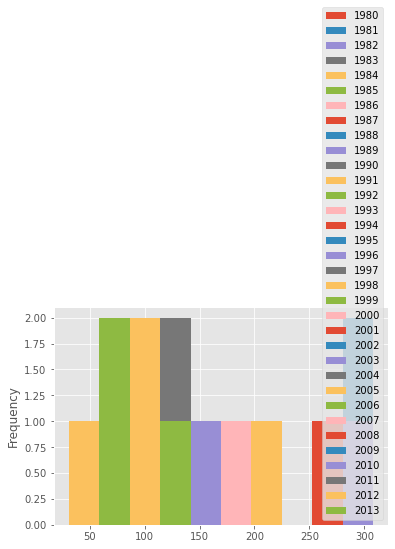

In [75]:
# plot histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

First need to transpose the data

In [77]:
# transpose data 
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


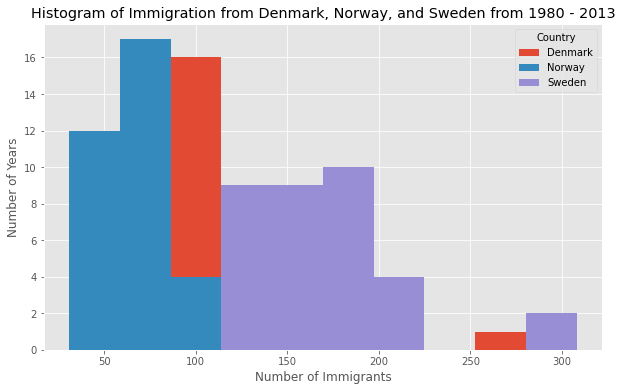

In [82]:
# plot histogram
df_t.plot.hist(figsize=(10,6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

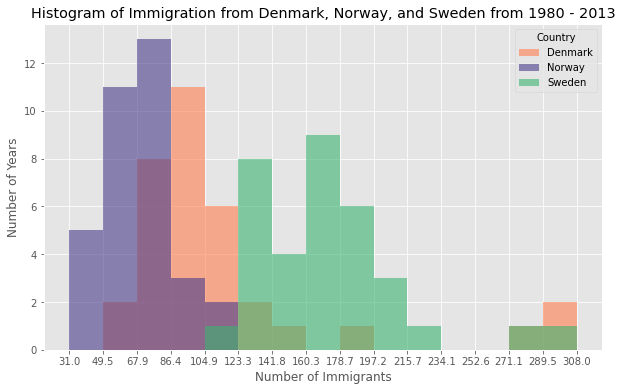

In [86]:
#Let's make a few modifications to improve the impact and aesthetics of the previous plot:

# increase the bin size to 15 by passing in bins parameter
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,           # set transparency to 60% by passing in alpha paramemter
          xticks=bin_edges,    # label the x-axis by passing in x-label paramater
          color=['coral', 'darkslateblue', 'mediumseagreen'] # change the colors of the plots by passing in color parameter
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [87]:
# to see all available colors:
for name, hex in mpl.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


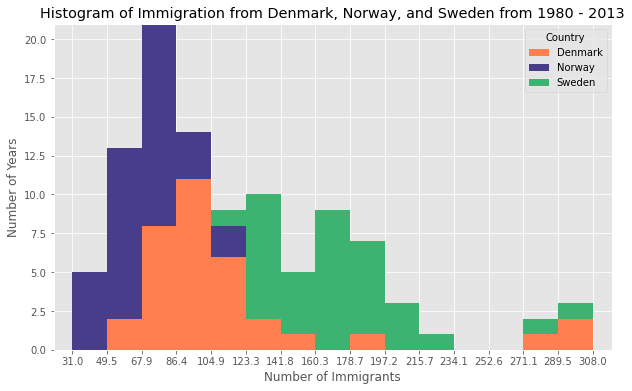

In [88]:
# use xlim parameter to set limits to x-axis to remove gap on edges
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10 #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes
xmax = bin_edges[-1] + 10 #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram - to avoid overlap of plots
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()


Question: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

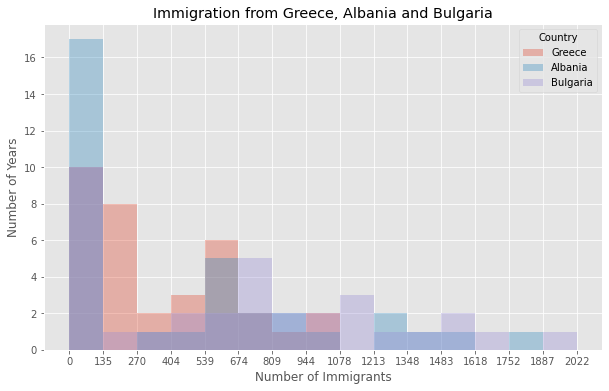

In [89]:
df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_t = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()

count, bin_edges = np.histogram(df_t, 15)

df_t.plot(kind='hist', stacked=False, alpha=.35, xticks=bin_edges, bins=15, figsize=(10, 6))

plt.title('Immigration from Greece, Albania and Bulgaria')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Bar Charts: the length of the bar represents the magnitude/size of the feature/variable

Question: Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [91]:
# get the data
df_ice = df_can.loc['Iceland', years]
df_ice.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

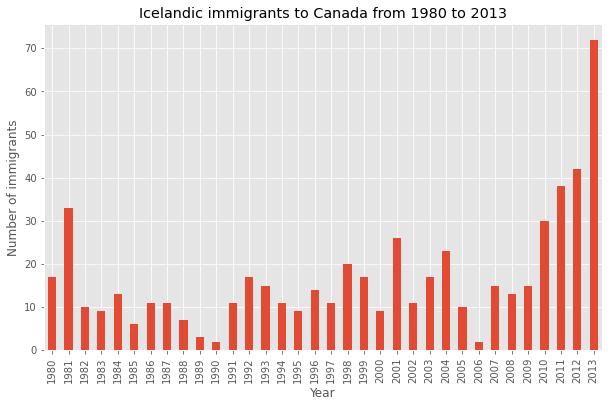

In [93]:
# plot 
df_ice.plot(kind='bar', figsize=(10,6))
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

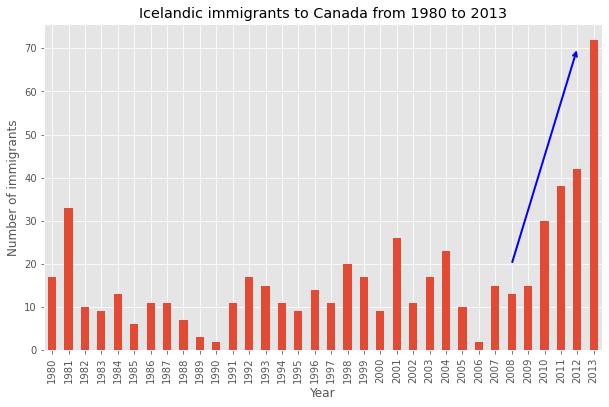

In [95]:
# now annotate the plot
df_ice.plot(kind='bar', figsize=(10,6), rot=90) # rotate the xticks by 90 degrees

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

# annotate arrow
plt.annotate('',                        # leave str blank for no text 
             xy=(32, 70),               # place head of arrow at point
             xytext=(28, 20),            # place base of arrow will start
             xycoords='data',           # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)   # properties of arrow    
             )

plt.show()


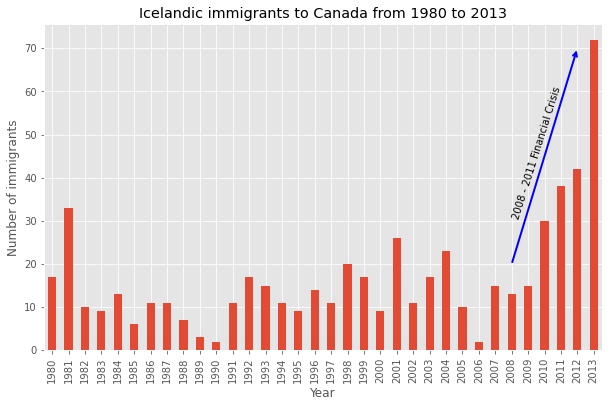

In [96]:
# add text annotation above arrow annotation

df_ice.plot(kind='bar', figsize=(10,6), rot=90) # rotate the xticks by 90 degrees

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

# annotate arrow
plt.annotate('',                        # leave str blank for no text 
             xy=(32, 70),               # place head of arrow at point
             xytext=(28, 20),            # place base of arrow will start
             xycoords='data',           # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)   # properties of arrow    
             )

# annotate text
plt.annotate('2008 - 2011 Financial Crisis',    # text to display
             xy=(28,30),                        # start of text point
             rotation=72.5,                     # use trial and error to align
             va='bottom',                       # want text to be vertically aligned 'bottom'
             ha='left',                         # horizontally aligned 'left'
            )

plt.show()

Horizontal Bar Plot

Question: Using the scripting layter and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

In [99]:
# first get top 15
df_can.sort_values(['Total'], ascending=False)
df_top15 = df_can.sort_values(['Total'], ascending=False).iloc[0:15]
df_top15 = df_top15['Total']
df_top15



Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

In [104]:
df_top15.index
df_top15.loc['China']


659962

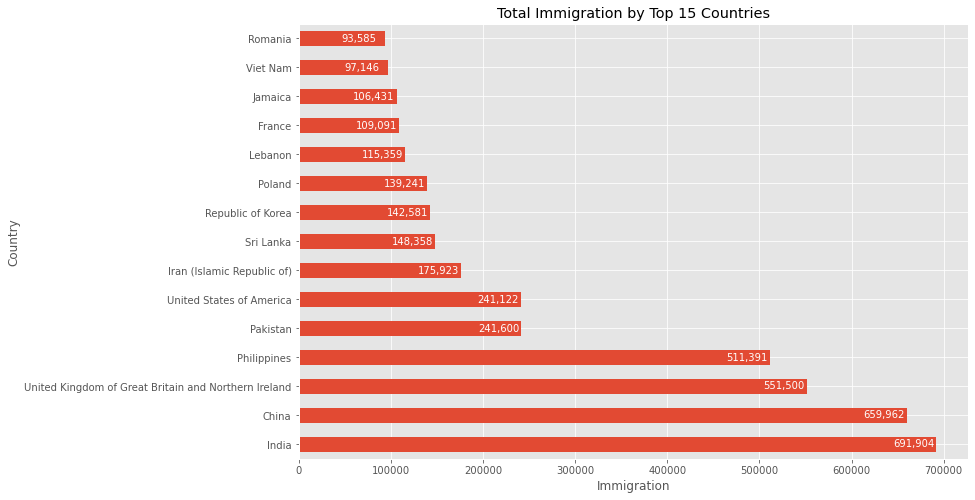

In [106]:
# generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

df_top15.plot(kind='barh', figsize=(12, 8))

plt.title('Total Immigration by Top 15 Countries')
plt.ylabel('Country')
plt.xlabel('Immigration')

for index, value in enumerate(df_top15):
    plt.annotate(str(format(value, ',')),
                xy=(value - 47000, index - .1), # start text at the end of its bar
                color='white'
                )
plt.show()